In [21]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Reading the file

df = pd.read_csv(r"C:\Users\Lavanya\OneDrive\Desktop\ipnyb files\Internship\Ratings prediction project\ratings data.csv")
df.head()

Review  Rating
0  Good laptop for the money. Windows is unusable...       4
1  Don't waste your money for assemble pc😎.\n\nIt...       5
2  Lenovo IdeaPad s145 ryzen3 4gb 1tb\n\nPerforma...       4
3  So the very first thing is 4gb ram which is wa...       3
4  It's a great laptop I got it under 29k best bu...       5

In [23]:
df.shape

(22489, 2)

There are 22489 entries with one feature and one target.

The review column consists of text data i.e. the written reviews by the consumers which needs to be processed and classified into ratings(1-5).

In [24]:
df.isnull().sum()

Review    1
Rating    0
dtype: int64

There is one missing entry in the review column, we will drop that entry as it has no input

In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().any()

Review    False
Rating    False
dtype: bool

2    4699
1    4631
4    4454
3    4363
5    4341
Name: Rating, dtype: int64


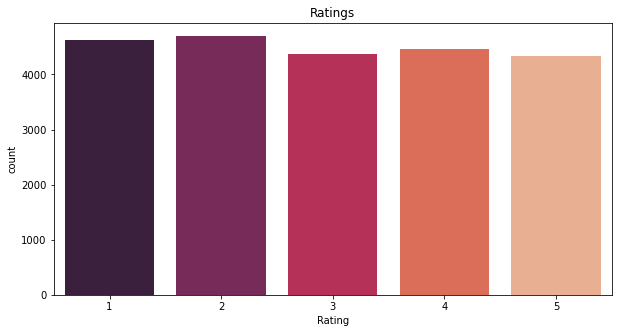

In [27]:
# Countplot of the target

print(df['Rating'].value_counts())
plt.figure(figsize=(10,5),)
sns.countplot(df['Rating'],palette='rocket')
plt.title('Ratings')
plt.show()

The target is fairly balanced and does not require resampling.

In [28]:
# Importing necessary libraries for text processing

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import  stopwords
import string
import re

In [29]:
# all text to lower case
df['Review']=df['Review'].str.lower()

# removing punctuation
df['Review'] = df['Review'].str.replace('[^\w\s]','')

# removing numbers
df['Review'] = df['Review'].str.replace(r'[^a-zA-z.,!?/:;\"\'\s]','')

# removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [30]:
# looking at the rare words

freq = pd.Series(' '.join(df['Review']).split()).value_counts()[-20:] # 10 rare words
freq = list(freq.index)
freq

['adjustbl',
 'nicc',
 'printertotly',
 'hfp',
 'compitable',
 'rsmic',
 'keybroard',
 'existed',
 'prolific',
 'sime',
 'lessen',
 'batteryits',
 'printeramd',
 'amoledbut',
 'inactivity',
 'fills',
 'manageble',
 'lika',
 'badtoo',
 'cooperated']

In [31]:
# common words

from collections import Counter
cnt = Counter()
for text in df["Review"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('good', 9006),
 ('product', 5975),
 ('quality', 4212),
 ('sound', 3644),
 ('battery', 1897),
 ('nice', 1890),
 ('price', 1889),
 ('one', 1791),
 ('buy', 1778),
 ('working', 1768),
 ('bad', 1750),
 ('laptop', 1660),
 ('bass', 1587),
 ('dont', 1538),
 ('also', 1478),
 ('best', 1424),
 ('use', 1353),
 ('money', 1347),
 ('range', 1224),
 ('time', 1162)]

In [32]:
# Converting emojis to words

from emot.emo_unicode import UNICODE_EMO
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
        return text


df['Review']=df['Review'].apply(convert_emojis)

In [33]:
# tokenization
df['tok_text'] = df.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)

df.head()

Review  Rating  \
0  good laptop money windows unusable default con...       4   
1  dont waste money assemble pc good know laptop ...       5   
2  lenovo ideapad ryzen gb tb performance design ...       4   
3  first thing gb ram way low anything stylish sl...       3   
4  great laptop got k best buy add gb ram see mag...       5   

                                            tok_text  
0  [good, laptop, money, windows, unusable, defau...  
1  [dont, waste, money, assemble, pc, good, know,...  
2  [lenovo, ideapad, ryzen, gb, tb, performance, ...  
3  [first, thing, gb, ram, way, low, anything, st...  
4  [great, laptop, got, k, best, buy, add, gb, ra...

In [13]:
# all text to lower case
df['Review']=df['Review'].str.lower()

# removing non-ascii
df['Review'] = df['Review'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

# removing punctuation
df['Review'] = df['Review'].str.replace('[^\w\s]','')

# removing numbers
df['Review'] = df['Review'].str.replace(r'[^a-zA-z.,!?/:;\"\'\s]','')

# removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# tokenization
df['tok_text'] = df.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)

df.head()

Review  Rating  \
0  good laptop money windows unusable default con...       4   
1  dont waste money assemble pc good know laptop ...       5   
2  lenovo ideapad ryzen gb tb performance design ...       4   
3  first thing gb ram way low anything stylish sl...       3   
4  great laptop got k best buy add gb ram see mag...       5   

                                            tok_text  
0  [good, laptop, money, windows, unusable, defau...  
1  [dont, waste, money, assemble, pc, good, know,...  
2  [lenovo, ideapad, ryzen, gb, tb, performance, ...  
3  [first, thing, gb, ram, way, low, anything, st...  
4  [great, laptop, got, k, best, buy, add, gb, ra...

In [34]:
# creating a new column containing the number of words

df['word_count'] = df.tok_text.str.len()
df.head()

Review  Rating  \
0  good laptop money windows unusable default con...       4   
1  dont waste money assemble pc good know laptop ...       5   
2  lenovo ideapad ryzen gb tb performance design ...       4   
3  first thing gb ram way low anything stylish sl...       3   
4  great laptop got k best buy add gb ram see mag...       5   

                                            tok_text  word_count  
0  [good, laptop, money, windows, unusable, defau...          52  
1  [dont, waste, money, assemble, pc, good, know,...          36  
2  [lenovo, ideapad, ryzen, gb, tb, performance, ...          45  
3  [first, thing, gb, ram, way, low, anything, st...          50  
4  [great, laptop, got, k, best, buy, add, gb, ra...          13

11


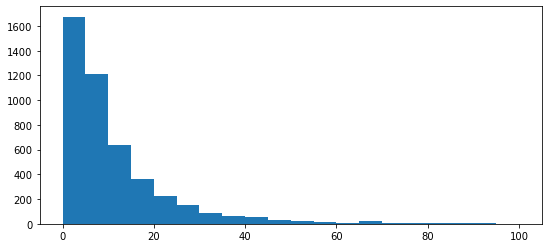

8


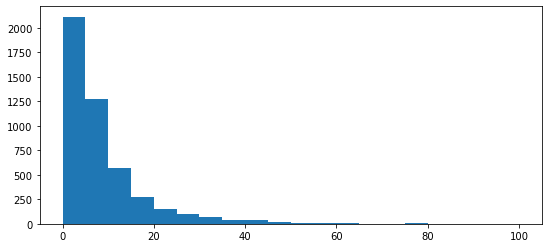

9


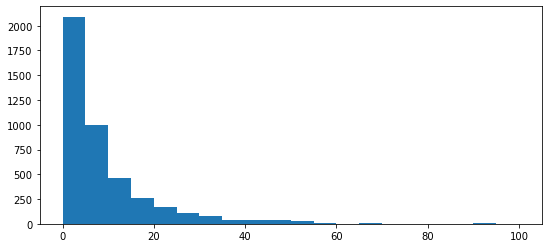

11


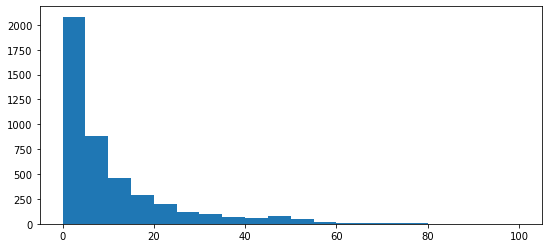

11


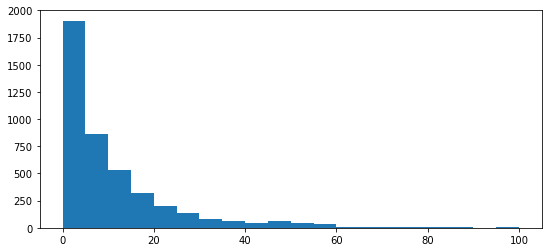

In [35]:
# Histograms to understand the distribution of word_count in different ratings.

st1 = df[df['Rating']==1]
st2 = df[df['Rating']==2]
st3 = df[df['Rating']==3]
st4 = df[df['Rating']==4]
st5 = df[df['Rating']==5]
for i in [st1,st2,st3,st4,st5]:
    plt.figure(figsize=(9,4))
    plt.hist(i['word_count'],bins=20,range = (0,100))
    print(int(i['word_count'].mean()))
    plt.show()

The word count does not vary much with respect to the rating achieved. The average word count for each class is also similar.

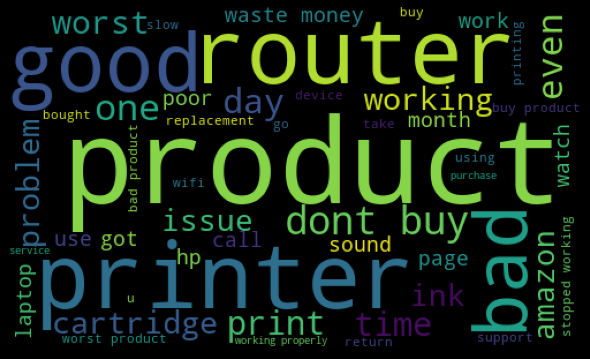

In [36]:
# Getting sense of loud words in different ratings

from wordcloud import WordCloud
s1 = df['Review'][df['Rating']==1]
s1_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(s1))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(s1_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

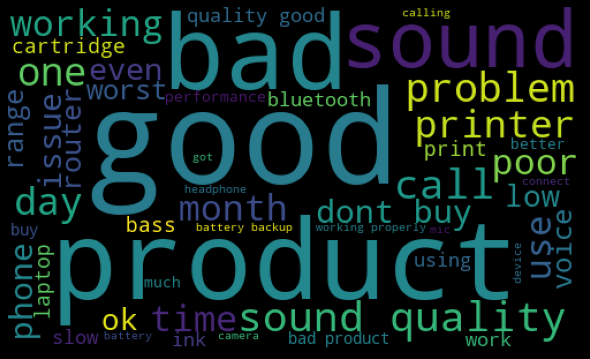

In [37]:
from wordcloud import WordCloud
s2 = df['Review'][df['Rating']==2]
s2_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(s2))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(s2_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

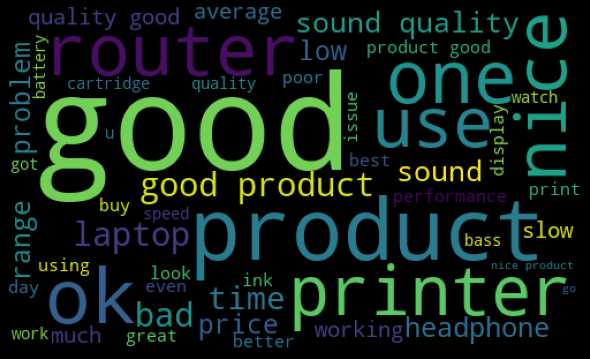

In [38]:
from wordcloud import WordCloud
s3 = df['Review'][df['Rating']==3]
s3_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(s3))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(s3_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

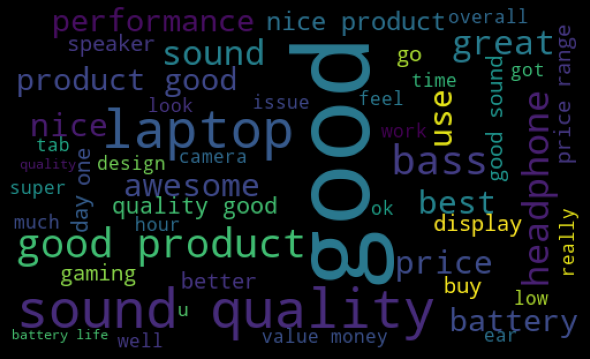

In [39]:
from wordcloud import WordCloud
s4 = df['Review'][df['Rating']==4]
s4_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(s4))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(s4_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [40]:
from wordcloud import WordCloud
s5 = df['Review'][df['Rating']==5]
s5_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(s5))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(s5_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [49]:
# Vectorization with Tfidf

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(preprocessor=' '.join, stop_words='english',max_features=5000)
tfidf.fit(df['tok_text'])

TfidfVectorizer(max_features=5000,
                preprocessor=<built-in method join of str object at 0x0000018CB31291F0>,
                stop_words='english')

In [50]:
# declaring input and target

x = tfidf.transform(df['tok_text']) 
y = df['Rating']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0,stratify=y)

In [56]:
# Running multiple models and evaluating the performance

model = [MultinomialNB(),DecisionTreeClassifier(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("Accuracy score of", m,"is",accuracy_score(y_test,pred))
    print("Confusion matrix: \n",confusion_matrix(y_test,pred))
    print("Classification report: \n",classification_report(y_test,pred))
    print("\n")

Accuracy score of MultinomialNB() is 0.5046687416629613
Confusion matrix: 
 [[590 229  48  38  21]
 [238 469  79 100  54]
 [131 123 249 275  95]
 [ 25  52  61 478 275]
 [ 17  33  30 304 484]]
Classification report: 
               precision    recall  f1-score   support

           1       0.59      0.64      0.61       926
           2       0.52      0.50      0.51       940
           3       0.53      0.29      0.37       873
           4       0.40      0.54      0.46       891
           5       0.52      0.56      0.54       868

    accuracy                           0.50      4498
   macro avg       0.51      0.50      0.50      4498
weighted avg       0.51      0.50      0.50      4498



Accuracy score of DecisionTreeClassifier() is 0.40395731436193866
Confusion matrix: 
 [[461 272 106  50  37]
 [274 359 127 117  63]
 [146 150 239 238 100]
 [ 46  91 107 386 261]
 [ 42  56  86 312 372]]
Classification report: 
               precision    recall  f1-score   support

          

In [57]:
# hyperparameter tuning with gridsearchCV on SVC

from sklearn.model_selection import GridSearchCV
svc = SVC()
p = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],'kernel': ['rbf','linear']} 
a = GridSearchCV(svc,p,cv=3)
a.fit(x,y)
a.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [59]:
# SVM after hyperparameter tuning

svc = SVC(C=1,gamma=0.1,kernel='rbf')
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Accuracy score of", svc,"is",accuracy_score(y_test,pred))
print("Confusion matrix: \n",confusion_matrix(y_test,pred))
print("Classification report: \n",classification_report(y_test,pred))

Accuracy score of SVC(C=1, gamma=0.1) is 0.5042240995998222
Confusion matrix: 
 [[607 214  57  30  18]
 [264 455  84 105  32]
 [152 120 289 246  66]
 [ 40  50  91 476 234]
 [ 37  29  50 311 441]]
Classification report: 
               precision    recall  f1-score   support

           1       0.55      0.66      0.60       926
           2       0.52      0.48      0.50       940
           3       0.51      0.33      0.40       873
           4       0.41      0.53      0.46       891
           5       0.56      0.51      0.53       868

    accuracy                           0.50      4498
   macro avg       0.51      0.50      0.50      4498
weighted avg       0.51      0.50      0.50      4498



In [60]:
# Saving the model

import joblib
joblib.dump(svc,'ratings.pkl')

['ratings.pkl']